## Fake News Classifier Using Bidirectional LSTM

Dataset: https://www.kaggle.com/c/fake-news/data#

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')
#df1=pd.read_csv('fake_or_real_new1s.csv')
#new_df = df1[['title','text','label']].copy()


In [3]:
df=df.drop(['id'], axis=1)


In [4]:
df=df.drop(['author'], axis=1)

In [5]:
df.head()
df.dtypes

title    object
text     object
label     int64
dtype: object

In [6]:
#new_df.head()

#new_df.dtypes

In [7]:
#frames = [df,new_df]
#df= pd.concat(frames)

In [8]:
###Drop Nan Values
df=df.dropna()


In [9]:
#df['label'] = pd.to_numeric(df['label'] ,errors='coerce')

In [10]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [11]:


## Get the Dependent features
y=df['label']

In [12]:
y.value_counts()

0    10387
1     9816
Name: label, dtype: int64

In [13]:
X.shape

(20203, 2)

In [14]:
y.shape

(20203,)

In [15]:
import tensorflow as tf

In [16]:
tf.__version__

'2.5.2'

In [17]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [18]:
### Vocabulary size
voc_size=5000

### Onehot Representation

In [19]:
messages=X.copy()

In [20]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [21]:
messages.reset_index(inplace=True)

In [22]:
import nltk
import re
from nltk.corpus import stopwords

In [23]:
#nltk.download('stopwords')

In [24]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):

    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [25]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find hom

In [26]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[1490, 4034, 682, 3809, 153, 2591, 1247, 3819, 2348, 3825],
 [2819, 658, 4077, 3066, 1439, 1674, 4903],
 [4168, 3226, 299, 1723],
 [1594, 725, 2484, 183, 4505, 2412],
 [3955, 1439, 933, 3485, 1095, 1062, 1439, 3381, 2247, 4896],
 [187,
  1798,
  4563,
  1591,
  1556,
  2761,
  673,
  3062,
  3422,
  4677,
  37,
  341,
  1682,
  98,
  4903],
 [1319, 1319, 1570, 2847, 1796, 1923, 1023, 3235, 2405, 3004, 3552, 4068],
 [345, 2998, 4297, 548, 3286, 527, 4331, 2515, 3902, 3945, 301],
 [2887, 2666, 1204, 4611, 2761, 1071, 3870, 3266, 1326, 1, 3902, 3945, 301],
 [1040, 111, 875, 2359, 2458, 3120, 2761, 567, 3902, 3945, 301],
 [77, 3328, 2807, 2370, 1051, 2351, 3606, 3162, 2761, 3003],
 [33, 3716, 1606, 3705, 4204, 1051, 3854, 500],
 [45, 2220, 1347, 4747, 917, 2970, 4803, 3711, 4526, 3418, 1213],
 [183, 2985, 153, 2351, 2761, 2458],
 [4687, 4396, 1890, 2358, 333, 963, 2244, 3459, 1379],
 [4423, 4083, 242, 836, 4132, 3937, 4140, 3902, 3945, 301],
 [2263, 3996, 2179, 3499, 1793, 3902, 3945, 301

### Embedding Representation

In [27]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3819 2348 3825]
 [   0    0    0 ... 1439 1674 4903]
 [   0    0    0 ... 3226  299 1723]
 ...
 [   0    0    0 ... 3902 3945  301]
 [   0    0    0 ... 3665 4286 3097]
 [   0    0    0 ... 4729 4594 4026]]


In [28]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1490,
       4034,  682, 3809,  153, 2591, 1247, 3819, 2348, 3825])

In [29]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
## Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
len(embedded_docs),y.shape

(20203, (20203,))

In [32]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [33]:
X_final.shape,y_final.shape

((20203, 20), (20203,))

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Model Training

In [47]:
### Finally Training
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
212/212 [==============================] - 9s 25ms/step - loss: 0.2934 - accuracy: 0.8635 - val_loss: 0.2043 - val_accuracy: 0.9244
Epoch 2/10
212/212 [==============================] - 4s 19ms/step - loss: 0.1415 - accuracy: 0.9484 - val_loss: 0.2155 - val_accuracy: 0.9180
Epoch 3/10
212/212 [==============================] - 4s 19ms/step - loss: 0.1064 - accuracy: 0.9608 - val_loss: 0.2502 - val_accuracy: 0.9198
Epoch 4/10
212/212 [==============================] - 4s 19ms/step - loss: 0.0782 - accuracy: 0.9730 - val_loss: 0.2631 - val_accuracy: 0.9162
Epoch 5/10
212/212 [==============================] - 4s 19ms/step - loss: 0.0520 - accuracy: 0.9820 - val_loss: 0.2733 - val_accuracy: 0.9109
Epoch 6/10
212/212 [==============================] - 4s 19ms/step - loss: 0.0311 - accuracy: 0.9897 - val_loss: 0.3894 - val_accuracy: 0.9195
Epoch 7/10
212/212 [==============================] - 4s 19ms/step - loss: 0.0223 - accuracy: 0.9925 - val_loss: 0.4736 - val_accuracy: 0.9087

### Performance Metrics And Accuracy

In [50]:
y_pred1=model.predict_classes(X_test)

In [51]:
X_test

array([[   0,    0,    0, ...,  574, 2433, 2791],
       [   0,    0,    0, ..., 2487, 4063, 4857],
       [   0,    0,    0, ..., 2984, 3902, 2263],
       ...,
       [   0,    0,    0, ...,  995,  765, 1914],
       [   0,    0,    0, ...,  144, 3856, 4480],
       [   0,    0,    0, ...,  740, 3924, 2744]])

In [52]:
y_pred1

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [74]:
# make predictions on the new data using the trained model
X_new="House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It"
corpus1 = []
review = re.sub('[^a-zA-Z]', ' ', X_new)
review = review.lower()
review = review.split()
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
corpus1.append(review)
corpus1
#X_arr=np.array(embedded_docs)
##from tensorflow.keras.preprocessing.text import Tokenizer
##from tensorflow.keras.preprocessing.sequence import pad_sequences
##import numpy as np

# define the maximum length of a sequence
##sent_length = 20

# define the vocabulary size (same as before)
##voc_size = 5000

# create a tokenizer object and fit it to the input data
##tokenizer = Tokenizer(num_words=voc_size, lower=True)
#3tokenizer.fit_on_texts(['FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'])

# convert the input data to a sequence of integers
##X_new = tokenizer.texts_to_sequences(['FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'])

# pad the sequence to the maximum length
#3X_new = pad_sequences(X_new, padding='pre', maxlen=sent_length)

# make predictions on the new data using the trained model
##y_pred = model1.predict(X_new)

# convert the predicted probabilities to binary classes using a threshold of 0.5
##y_pred_binary = (y_pred > 0.5).astype(int)

# print the predicted binary classes
##print(y_pred_binary)

##y_pred = model1.predict(X_arr)

# convert the predicted probabilities to binary classes using a threshold of 0.5
#y_pred_binary = (y_pred > 0.5).astype(int)

# print the predicted binary classes
#print(y_pred_binary)

['hous dem aid even see comey letter jason chaffetz tweet']

In [75]:
onehot_repr1=[one_hot(words,voc_size)for words in corpus1] 
onehot_repr1

[[1490, 4034, 682, 3809, 153, 2591, 1247, 3819, 2348, 3825]]

In [76]:
sent_length=20
embedde_docs=pad_sequences(onehot_repr1,padding='pre',maxlen=sent_length)
#print(embedde_docs)

import numpy as np
X_final=np.array(embedde_docs)

y_pred = model.predict_classes(X_final)
print(y_pred)
# convert the predicted probabilities to binary classes using a threshold of 0.5
#y_pred_binary = (y_pred > 0.5).astype(int)

[[1]]


In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_test,y_pred1)

array([[3124,  295],
       [ 264, 2352]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.9073736536868269

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3419
           1       0.89      0.90      0.89      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



In [58]:
#pip install notebook --upgrade

In [38]:
import matplotlib.pyplot as plt

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


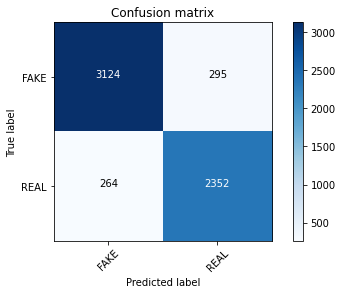

In [42]:

from sklearn import metrics
import numpy as np
import itertools
cm = metrics.confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])